# Описание датасета

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

In [602]:
#импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [603]:
#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [604]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит:
- 395 строк (учеников);
- 30 признаков, в т.ч. целевой признак - score - оценка по математике;
- из них 13 признаков числовых, 17 строковых.

# Функции предобработки

In [605]:
def get_boxplot(column):
    '''функция принимает признак. Рисует boxplot распределения признака column '''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()    
    
def get_stat_dif(column):
    ''' функция принимает признак. Проверяет, есть ли статистическая разница в распределении оценок
    по номинативным признакам, с помощью теста Стьюдента.
    Нулевая гипотеза - распределения признаков неразличимы  '''    
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break   


# Score

In [606]:
# Начнем с целевой переменной
# проверям пустые значения
students.score.isna().sum()

6

In [607]:
# в основном датасете удаляем эти строки
students = students[students.score.isna() == False]

In [608]:
# смотрим на значения
students.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

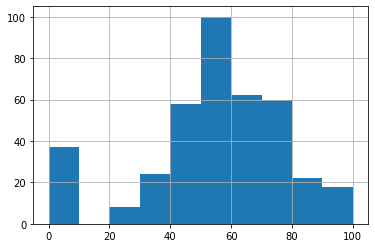

In [609]:
students.score.hist()

Распределение похоже на нормальное, но нулевые оценки выходят за его рамки.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


<AxesSubplot:>

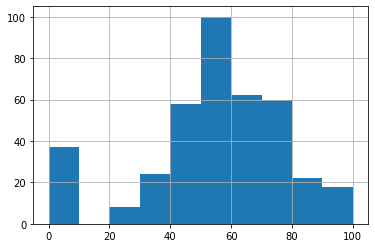

In [610]:
IQR = students.score.quantile(.75) - students.score.quantile(.25)
perc25 = students.score.quantile(.25)
perc75 = students.score.quantile(.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{l}, {r}].".format(l=perc25 - 1.5*IQR, r=perc75 + 1.5*IQR))
students_score_plot = students.score[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_score_plot.hist(bins = 10)


Получаем, что ученики с нулевой оценкой значимы для нас, их выбрасывать нельзя

# Absences

In [611]:
# проверям пустые значения
students.absences.isna().sum()

11

In [612]:
# смотрим на значения
students.absences.describe()

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<AxesSubplot:>

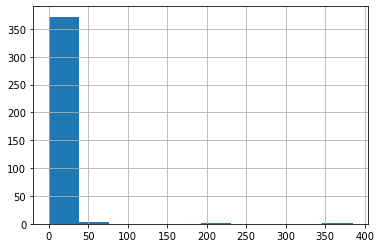

In [613]:
students.absences.hist()

Максимальные пропуски надо проверить на выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<AxesSubplot:>

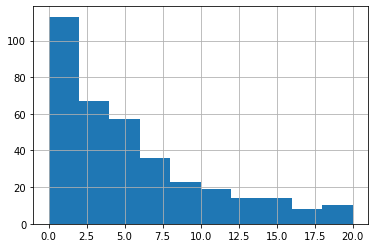

In [614]:
IQR = students.absences.quantile(.75) - students.absences.quantile(.25)
perc25 = students.absences.quantile(.25)
perc75 = students.absences.quantile(.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{l}, {r}].".format(l=perc25 - 1.5*IQR, r=perc75 + 1.5*IQR))
students_absences_plot = students.absences[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_absences_plot.hist(bins = 10)


In [615]:
# удаляем выбросы
students = students[students.absences <= 20.0]

# School

In [616]:
# смотрим на значения
students.school.describe()

count     361
unique      2
top        GP
freq      318
Name: school, dtype: object

In [617]:
students.school.value_counts()

GP    318
MS     43
Name: school, dtype: int64

В колонке 'school' нет пустых строк, присутствуют только две школы. Большая часть учеников учится в школе GP, остальные в MS.

# Sex

In [618]:
# смотрим на значения
students.sex.describe()

count     361
unique      2
top         F
freq      188
Name: sex, dtype: object

In [619]:
students.sex.value_counts()

F    188
M    173
Name: sex, dtype: int64

В колонке 'sex' нет пустых строк, присутствуют два пола.

# Age

In [620]:
# смотрим на значения
students.age.value_counts()

16    98
17    88
15    79
18    74
19    18
20     2
22     1
21     1
Name: age, dtype: int64

<AxesSubplot:>

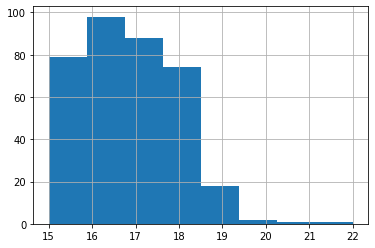

In [621]:
# визуализируем распределение
students.age.hist(bins = 8)

В колонке Age нет пустых строк. Данные распределены хорошо, выбросов нет. Большая часть учеников в возрасте 15 - 18 лет, в датасете содержатся данные по возрастам 15-22 года

# Address

In [622]:
# смотрим на значения
students.address.value_counts()

U    269
R     78
Name: address, dtype: int64

In [623]:
# проверям пустые значения
students.address.isna().sum()

14

В колонке 'Address' 14 пустых значений. Большая часть учеников живет в городе. Пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [624]:
# заполняем пустые строки новым значением
students.address = students.address.fillna('unknown')

# Famsize

In [625]:
# смотрим на значения
students.famsize.value_counts()

GT3    240
LE3     99
Name: famsize, dtype: int64

In [626]:
# проверям пустые значения
students.famsize.isna().sum()

22

В колонке 'Famsize' видим 22 пропущенных значения. Большая часть учеников живет в семье из 4 и более членов.


# Pstatus 

In [627]:
# смотрим на значения
students.Pstatus.value_counts()

T    291
A     32
Name: Pstatus, dtype: int64

In [628]:
# проверям пустые значения
students.Pstatus.isna().sum()

38

В колонке 'Pstatus' 38 пустых строк. Большая часть родителей живут вместе. Пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [629]:
# заполняем пустые строки новым значением
students.Pstatus = students.Pstatus.fillna('unknown')

# Medu

In [630]:
# смотрим на значения
students.Medu.value_counts()

4.0    121
2.0     93
3.0     88
1.0     53
0.0      3
Name: Medu, dtype: int64

In [631]:
# проверям пустые значения
students.Medu.isna().sum()

3

В колонке 'Medu' есть 3 пустых записи. Пустые строки можно заполнить медианой.

In [632]:
# заполняем пустые строки новым значением
students.Medu = students.Medu.fillna(students.Medu.median())

# Fedu

In [633]:
# смотрим на значения
students.Fedu.value_counts()

2.0     98
3.0     85
4.0     79
1.0     73
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [634]:
# проверям пустые значения
students.Fedu.isna().sum()

23

В колонке 'Fedu' есть 23 пустых записи. Пустые строки можно заполнить медианой. Есть ошибка заполнения - указано значение 40.
Вариант исправления - удалить.

In [635]:
# заполняем пустые строки новым значением
students.Fedu = students.Fedu.fillna(students.Fedu.median())
# исправляем ошибку ввода
students = students[students.Fedu != 40.0]

# Mjob

In [636]:
# смотрим на значения
students.Mjob.value_counts()

other       118
services     87
at_home      55
teacher      52
health       32
Name: Mjob, dtype: int64

In [637]:
# проверям пустые значения
students.Mjob.isna().sum()

16

В колонке 'Mjob' есть 16 пустых строк, 5 уникальных значений, пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [638]:
# заполняем пустые строки новым значением
students.Mjob = students.Mjob.fillna('unknown')

# Fjob

In [639]:
# смотрим на значения
students.Fjob.value_counts()

other       181
services     90
teacher      25
at_home      16
health       14
Name: Fjob, dtype: int64

In [640]:
# проверям пустые значения
students.Fjob.isna().sum()

34

В колонке 'Fjob' есть 34 пустых строки, 5 уникальных значений, пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [641]:
# заполняем пустые строки новым значением
students.Fjob = students.Fjob.fillna('unknown')

# Reason

In [642]:
# смотрим на значения
students.reason.value_counts()

course        127
home           92
reputation     92
other          32
Name: reason, dtype: int64

In [643]:
# проверям пустые значения
students.reason.isna().sum()

17

В колонке 'Reason' есть 17 пустых строк, 4 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [644]:
# заполняем пустые строки новым значением
students.reason = students.reason.fillna('unknown')

# Guardian 

In [645]:
# смотрим на значения
students.guardian.value_counts()

mother    227
father     82
other      21
Name: guardian, dtype: int64

In [646]:
# проверям пустые значения
students.guardian.isna().sum()

30

В колонке 'Guardian' есть 30 пустых строк, 3 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [647]:
# заполняем пустые строки новым значением
students.guardian = students.guardian.fillna('unknown')

# Traveltime

In [648]:
# смотрим на значения
students.traveltime.value_counts()

1.0    221
2.0     84
3.0     20
4.0      7
Name: traveltime, dtype: int64

In [649]:
# проверям пустые значения
students.traveltime.isna().sum()

28

В колонке 'Traveltime' есть 28 пустых записи. Пустые строки можно заполнить медианой.

In [650]:
# заполняем пустые строки новым значением
students.traveltime = students.traveltime.fillna(students.traveltime.median())

# Studytime

In [651]:
# смотрим на значения
students.studytime.value_counts()

2.0    174
1.0     96
3.0     58
4.0     27
Name: studytime, dtype: int64

In [652]:
# проверям пустые значения
students.studytime.isna().sum()

5

В колонке 'Studytime' есть 5 пустых записей. 4 уникальных значения. Выбросов нет. Пустые строки можно заполнить медианой.

In [653]:
# заполняем пустые строки новым значением
students.studytime = students.studytime.fillna(students.studytime.median())

# Studytime, granular

In [654]:
# смотрим на значения
# переименуем колонку в удобный для обработки вид
students = students.rename(columns={"studytime, granular": "granular"})
students.granular.value_counts()

-6.0     174
-3.0      96
-9.0      58
-12.0     27
Name: granular, dtype: int64

Колонка напоминает 'studytime'. Предположительно признак 'studytime' умножили на -3.

In [655]:
# Используем матрицу корреляций:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167178,-0.157254,0.083827,0.004496,0.177986,-0.004509,0.060257,0.038687,0.124472,-0.063016,0.155396,-0.158443
Medu,-0.167178,1.000000,0.599291,-0.171894,0.088820,-0.241098,-0.089267,-0.005038,0.039649,0.056574,-0.055362,0.065886,0.207237
Fedu,-0.157254,0.599291,1.000000,-0.118036,-0.001161,-0.277637,0.001489,-0.019917,-0.014675,0.041298,0.009833,-0.026988,0.105784
traveltime,0.083827,-0.171894,-0.118036,1.000000,-0.097407,0.056460,0.098350,-0.036262,0.007888,0.043345,-0.027489,-0.039547,-0.062069
studytime,0.004496,0.088820,-0.001161,-0.097407,1.000000,-0.174574,-1.000000,0.033317,-0.134382,-0.033368,-0.090155,-0.075008,0.111294
failures,0.177986,-0.241098,-0.277637,0.056460,-0.174574,1.000000,0.175908,-0.016055,0.087393,0.079202,0.099894,0.076389,-0.329232
granular,-0.004509,-0.089267,0.001489,0.098350,-1.000000,0.175908,1.000000,-0.033733,0.136157,0.033734,0.090884,0.075216,-0.112216
famrel,0.060257,-0.005038,-0.019917,-0.036262,0.033317,-0.016055,-0.033733,1.000000,0.182471,0.094837,0.072799,-0.102423,0.062157
freetime,0.038687,0.039649,-0.014675,0.007888,-0.134382,0.087393,0.136157,0.182471,1.000000,0.284364,0.041871,0.096096,0.036333
goout,0.124472,0.056574,0.041298,0.043345,-0.033368,0.079202,0.033734,0.094837,0.284364,1.000000,0.006312,0.112865,-0.121481


Так как переменные 'granular' и 'Studytime' скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная 'granular'.

# Failures

In [656]:
# смотрим на значения
students.failures.value_counts()

0.0    273
1.0     42
2.0     13
3.0     13
Name: failures, dtype: int64

In [657]:
# проверям пустые значения
students.failures.isna().sum()

19

В колонке 'Failures' есть 19 пустых записей. 4 уникальных значения. Выбросов нет. Пустые строки можно заполнить медианой.

In [658]:
# заполняем пустые строки новым значением
students.failures = students.failures.fillna(students.failures.median())

# Schoolsup

In [659]:
# смотрим на значения
students.schoolsup.value_counts()

no     306
yes     45
Name: schoolsup, dtype: int64

In [660]:
# проверям пустые значения
students.schoolsup.isna().sum()

9

В колонке 'Schoolsup' есть 9 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить  новым значением 'unknown'.

In [661]:
# заполняем пустые строки новым значением
students.schoolsup = students.schoolsup.fillna('unknown')

# Famsup

In [662]:
# смотрим на значения
students.famsup.value_counts()

yes    201
no     125
Name: famsup, dtype: int64

In [663]:
# проверям пустые значения
students.famsup.isna().sum()

34

В колонке 'Famsup' есть 34 пустых строки, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [664]:
# заполняем пустые строки новым значением
students.famsup = students.famsup.fillna('unknown')

# Paid

In [665]:
# смотрим на значения
students.paid.value_counts()

no     185
yes    138
Name: paid, dtype: int64

In [666]:
# проверям пустые значения
students.paid.isna().sum()

37

В колонке 'Paid' есть 37 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [667]:
# заполняем пустые строки новым значением
students.paid = students.paid.fillna('unknown')

# Activities

In [668]:
# смотрим на значения
students.activities.value_counts()

yes    181
no     165
Name: activities, dtype: int64

In [669]:
# проверям пустые значения
students.activities.isna().sum()

14

В колонке 'Activities' есть 14 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [670]:
# заполняем пустые строки новым значением
students.activities = students.activities.fillna('unknown')

# Nursery

In [671]:
# смотрим на значения
students.nursery.value_counts()

yes    274
no      71
Name: nursery, dtype: int64

In [672]:
# проверям пустые значения
students.nursery.isna().sum()

15

В колонке 'Nursery' есть 15 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [673]:
# заполняем пустые строки новым значением
students.activities = students.nursery.fillna('unknown')

# Higher

In [674]:
# смотрим на значения
students.higher.value_counts()

yes    326
no      16
Name: higher, dtype: int64

In [675]:
# проверям пустые значения
students.higher.isna().sum()

18

В колонке 'Higher' есть 18 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [676]:
# заполняем пустые строки новым значением
students.activities = students.higher.fillna('unknown')

# Internet

In [677]:
# смотрим на значения
students.internet.value_counts()

yes    274
no      54
Name: internet, dtype: int64

In [678]:
# проверям пустые значения
students.internet.isna().sum()

32

В колонке 'Internet' есть 32 пустые строки, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [679]:
# заполняем пустые строки новым значением
students.activities = students.internet.fillna('unknown')

# Romantic

In [680]:
# смотрим на значения
students.romantic.value_counts()

no     220
yes    110
Name: romantic, dtype: int64

In [681]:
# проверям пустые значения
students.romantic.isna().sum()

30

В колонке 'Romantic' есть 30 пустых строк, 2 уникальных категориальных значения, пустые строки можно удалить, а можно заполнить новым значением 'unknown'.

In [682]:
# заполняем пустые строки новым значением
students.activities = students.romantic.fillna('unknown')

# Famrel

In [683]:
# смотрим на значения
students.famrel.value_counts()

 4.0    163
 5.0     92
 3.0     56
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [684]:
# проверям пустые значения
students.famrel.isna().sum()

26

В колонке 'Famrel' есть 26 пустых записей. Пустые строки можно заполнить медианой. Есть ошибка заполнения - указано значение -1. Вариант исправления - удалить.

In [685]:
# исправляем ошибку ввода
students = students[students.famrel != -1.0]
# заполняем пустые строки новым значением
students.famrel = students.famrel.fillna(students.famrel.median())

# Freetime

In [686]:
# смотрим на значения
students.freetime.value_counts()

3.0    143
4.0    104
2.0     55
5.0     35
1.0     15
Name: freetime, dtype: int64

In [687]:
# проверям пустые значения
students.freetime.isna().sum()

7

В колонке 'Freetime' есть 7 пустых записей. 5 уникальных значения. Выбросов нет. Пустые строки можно заполнить медианой.

In [688]:
# заполняем пустые строки новым значением
students.freetime = students.freetime.fillna(students.freetime.median())

# Goout

In [689]:
# смотрим на значения
students.goout.value_counts()

3.0    118
2.0     93
4.0     74
5.0     46
1.0     21
Name: goout, dtype: int64

In [690]:
# проверям пустые значения
students.goout.isna().sum()

7

В колонке 'Goout' есть 7 пустых записей. 5 уникальных значения. Выбросов нет. Пустые строки можно заполнить медианой.

In [691]:
# заполняем пустые строки новым значением
students.goout = students.goout.fillna(students.goout.median())

# Health

In [692]:
# смотрим на значения
students.health.value_counts()

5.0    128
3.0     82
4.0     54
1.0     41
2.0     39
Name: health, dtype: int64

In [693]:
# проверям пустые значения
students.health.isna().sum()

15

В колонке 'Health' есть 15 пустых записей. 5 уникальных значения. Выбросов нет. Пустые строки можно заполнить медианой.

In [694]:
# заполняем пустые строки новым значением
students.health = students.health.fillna(students.health.median())

# Корреляционный анализ

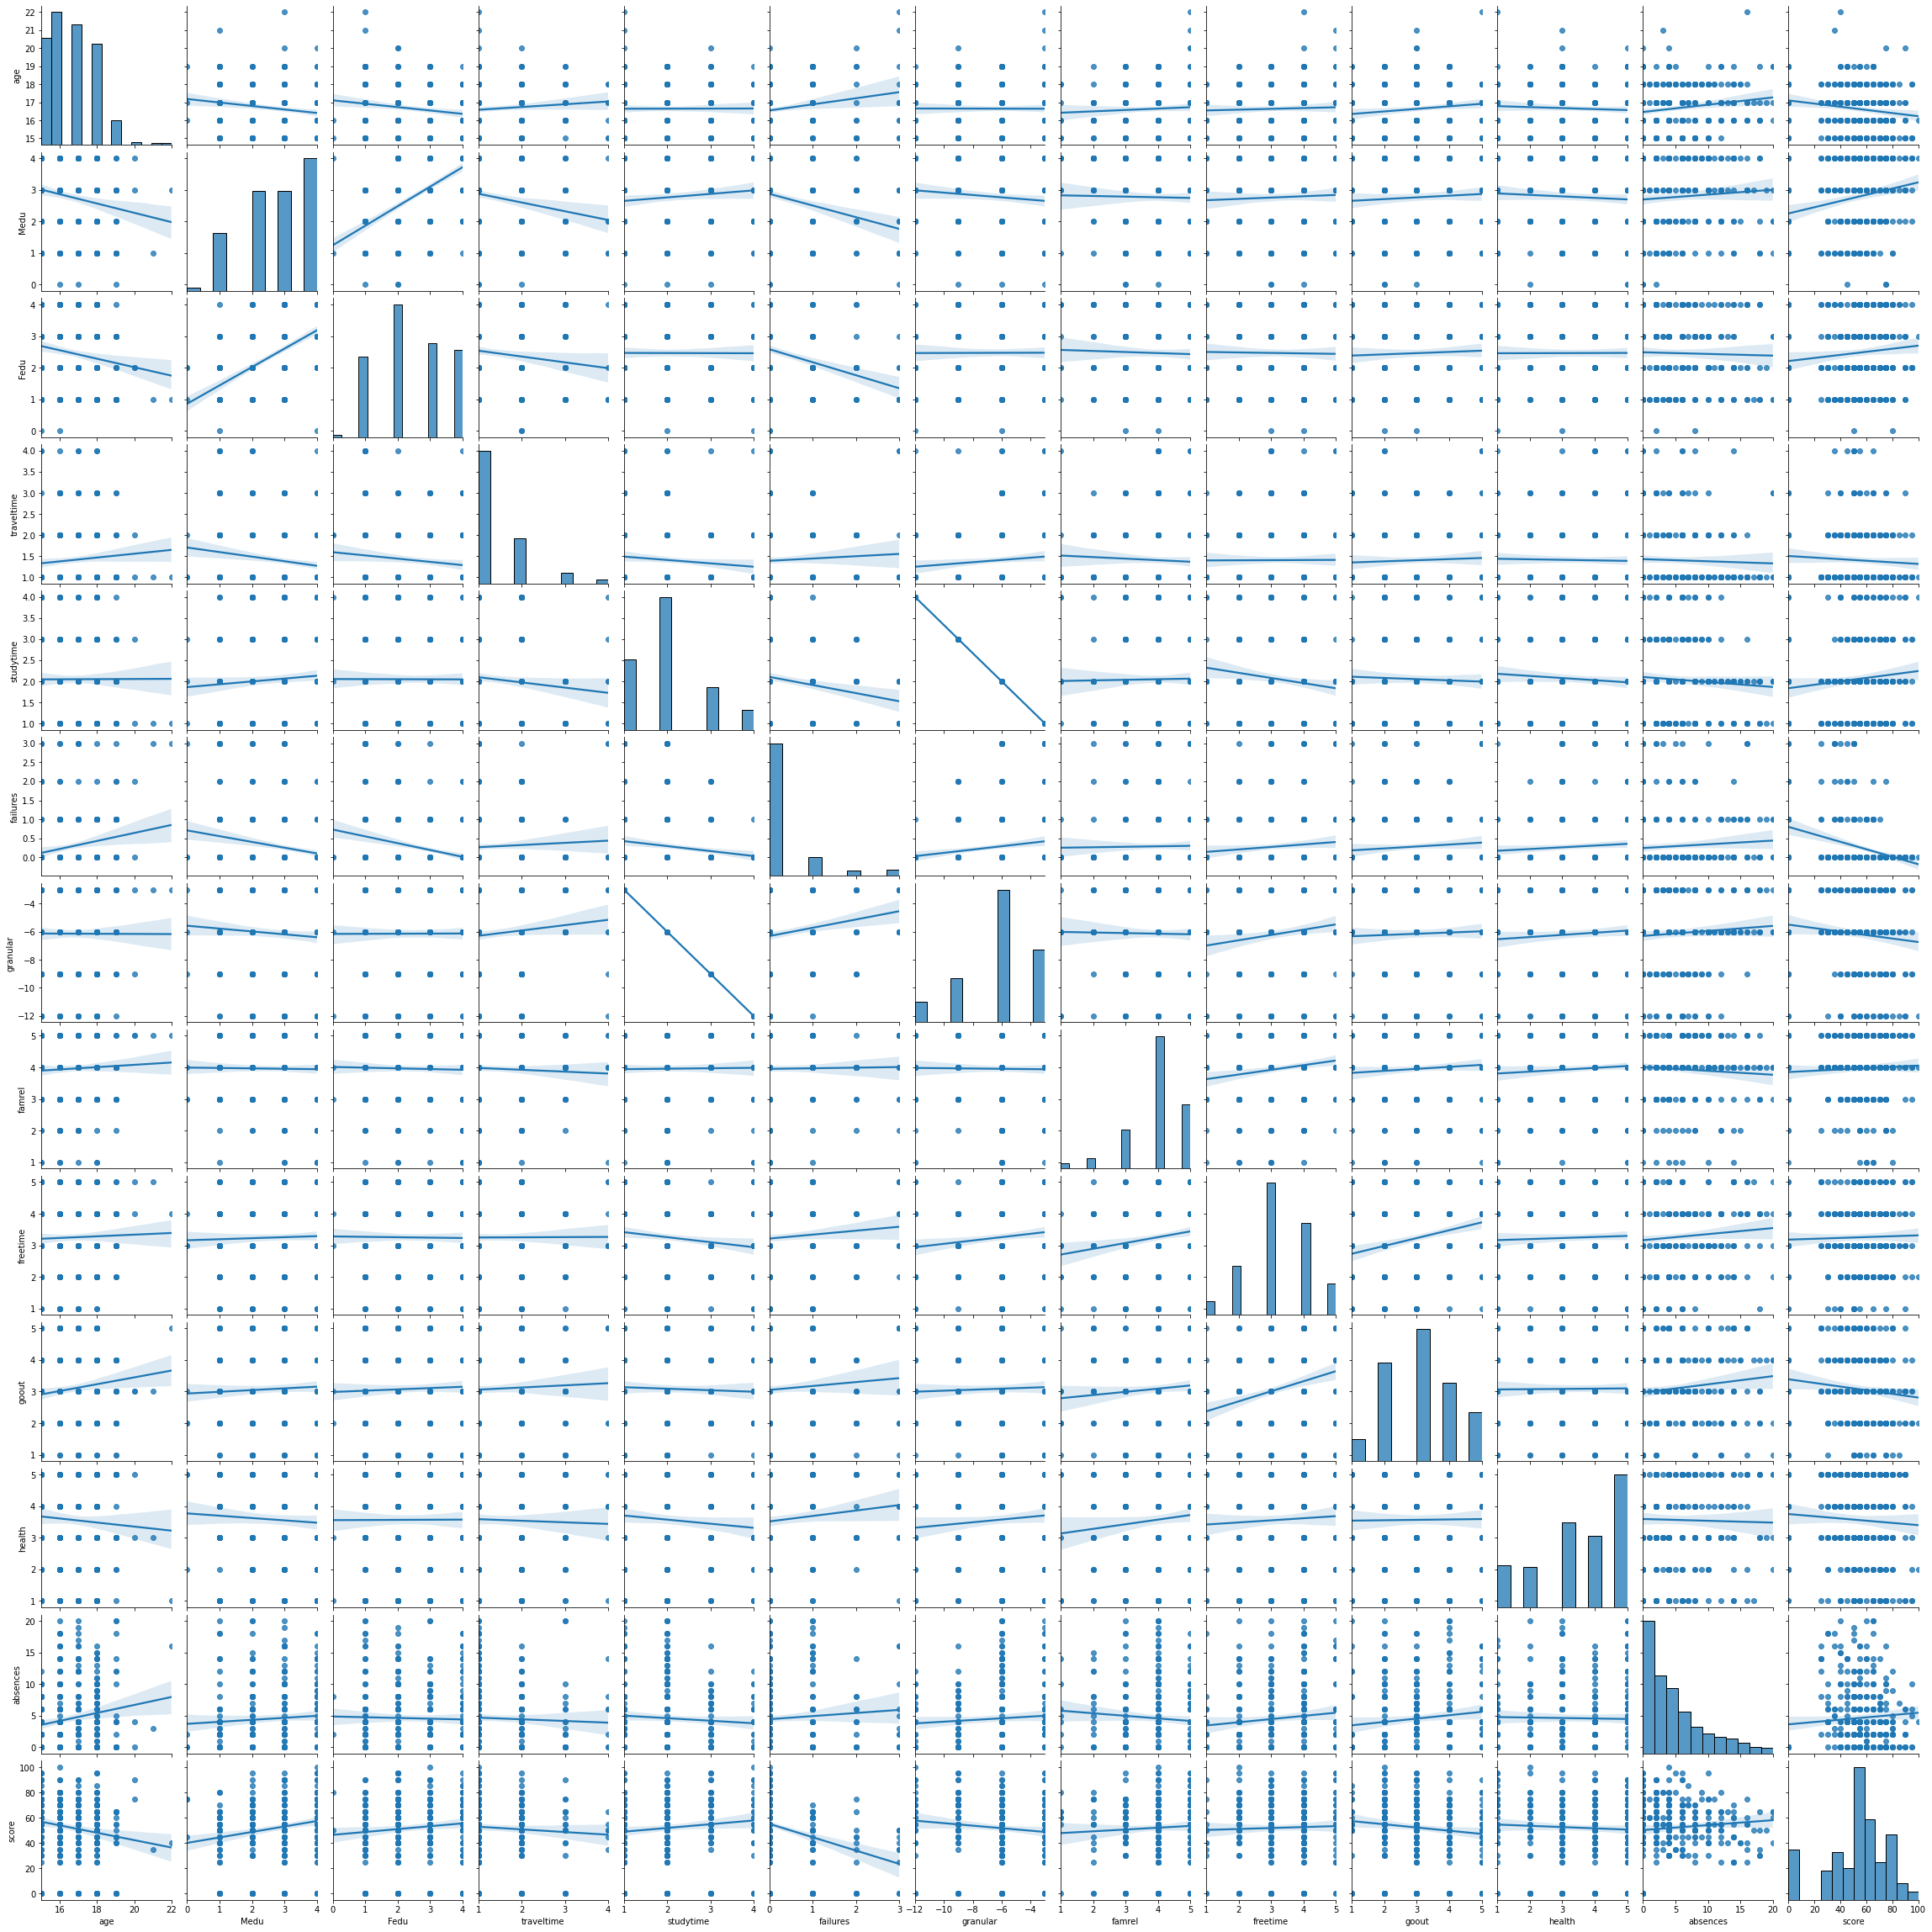

In [695]:
sns.pairplot(students, kind = 'reg')

1. Признак 'studytime_granular' линейно зависим от признака 'studytime', коэффициент корреляции равен -1. Поэтому признак 'studytime_granular' удаляем.
2. Признак 'failures' имеет хорошую корреляцию с образованием родителей ('Medu', 'Fedu'), а также еще более сильную корреляцию с результатами по математике 'score'.
3. Также хорошую скоррелированность с результатами 'score' показывают время на учёбу помимо школы('studytime') и проведенное времени с друзьями('goout').
4. Кандидаты на удаление: famsize, traveltime, famrel, freetime, health, absences. Значение корреляции отрицательное, либо близко к нулю. Не будем рассматривать их.

In [696]:
# удаляем количественные переменные
students = students.drop(['famsize', 'traveltime', 'famrel', 'freetime', 'absences', 'granular', 'health'], axis = 1)

# Анализ номинативных переменных

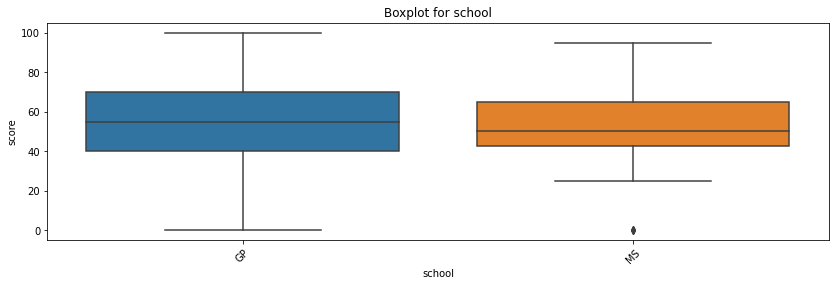

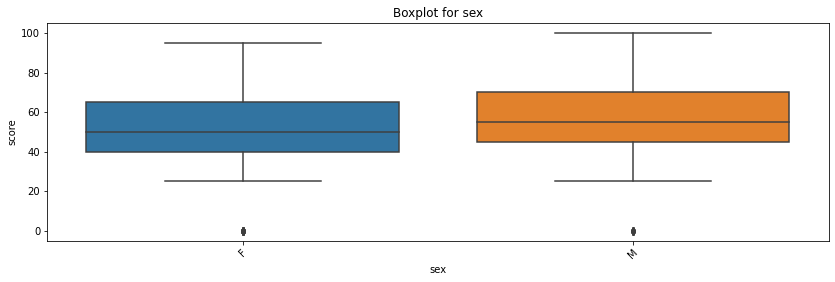

Найдены статистически значимые различия для колонки sex


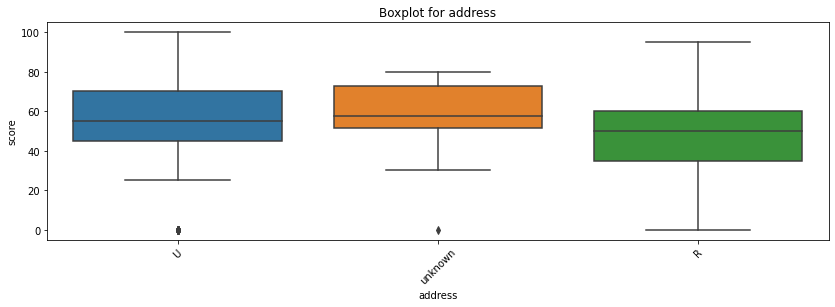

Найдены статистически значимые различия для колонки address


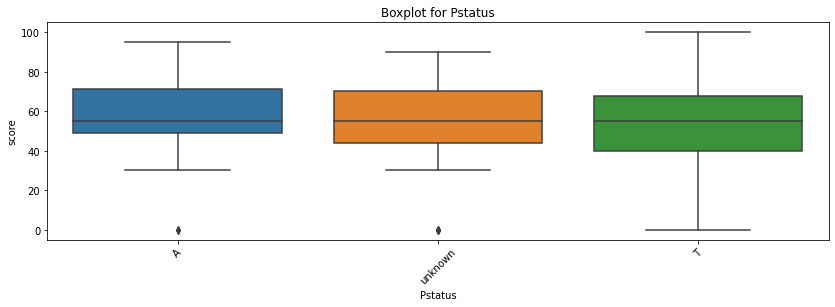

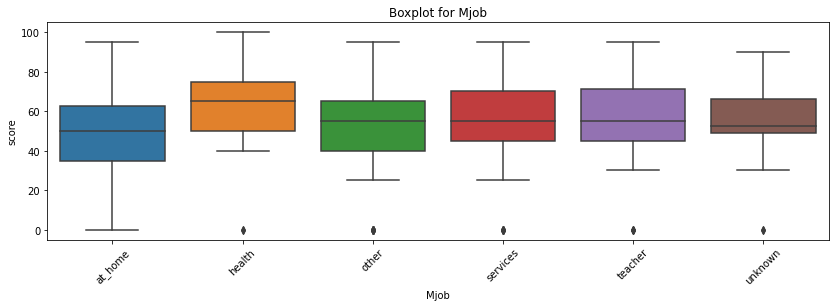

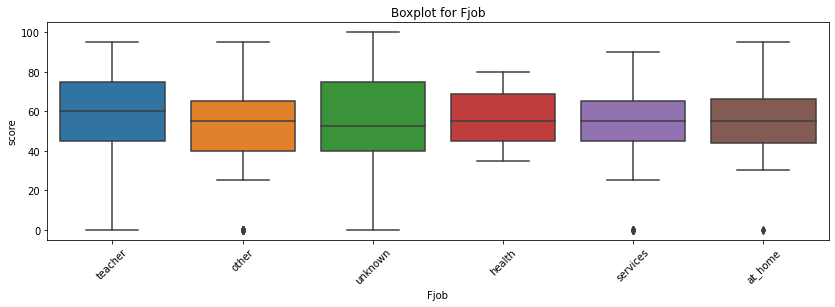

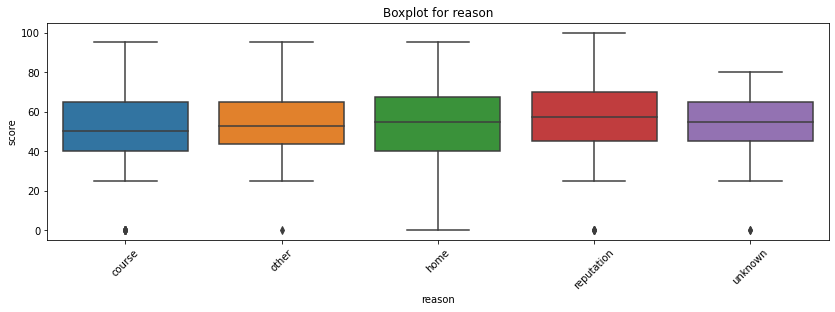

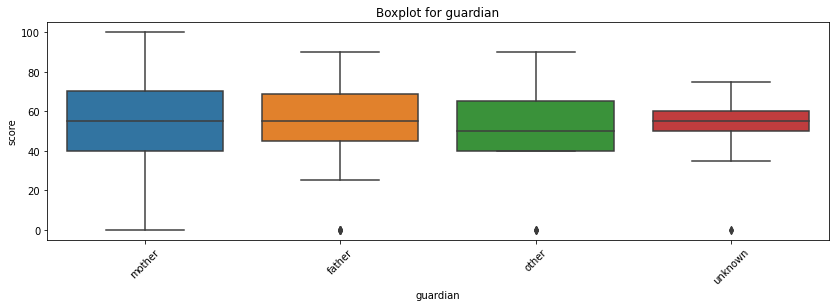

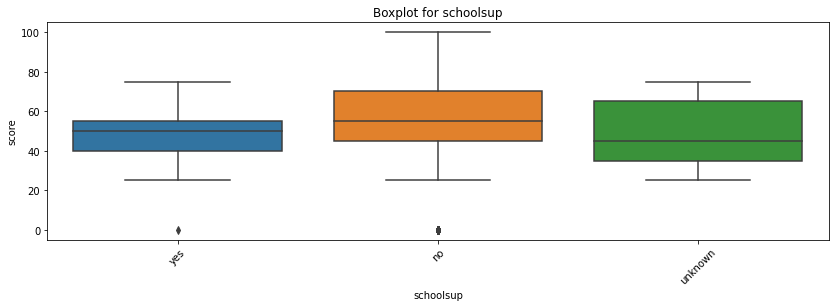

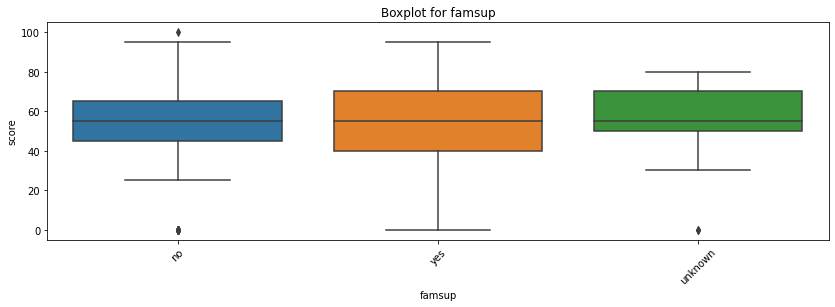

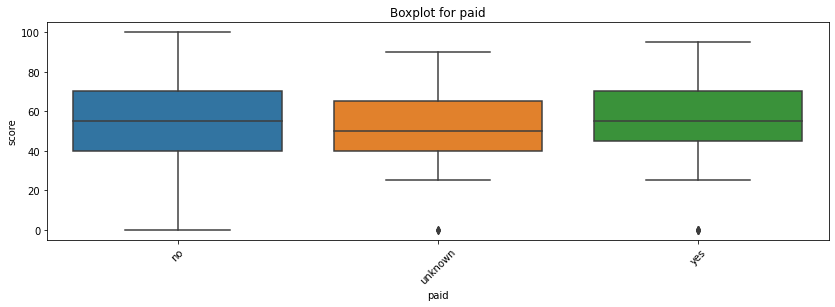

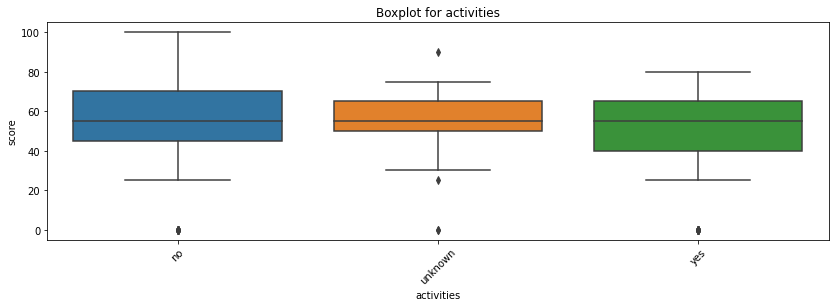

Найдены статистически значимые различия для колонки activities


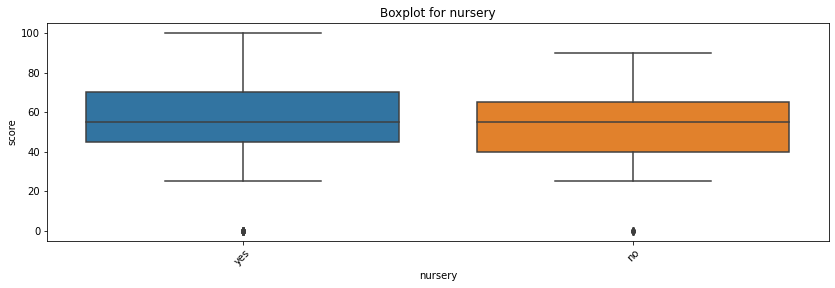

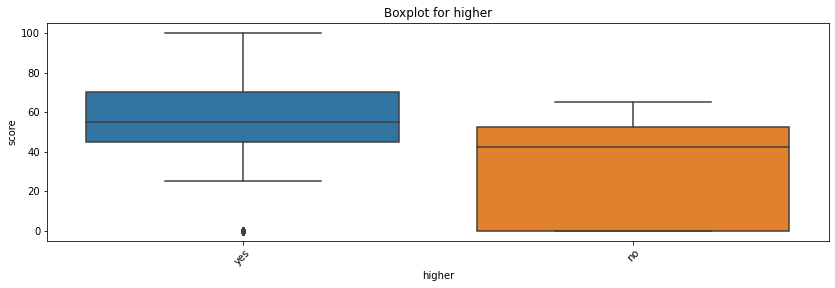

Найдены статистически значимые различия для колонки higher


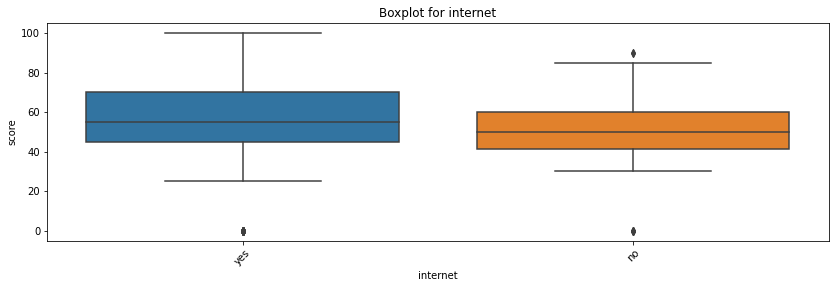

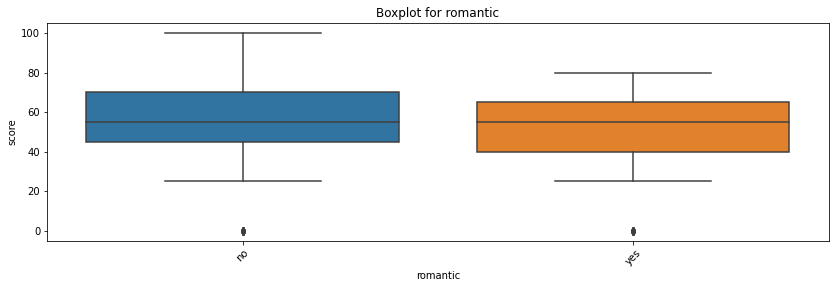

Найдены статистически значимые различия для колонки romantic


In [697]:
for col in ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 
                     'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                     'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)
    get_stat_dif(col)

Судя по графикам распределений и результатам теста Тьюринга, следующие признаки можно исключить как незначимые для анализа зависимости результатов по математике:
*school, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, nursery, internet*

In [698]:
# удаляем номинативные переменные 
students = students.drop(['school', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', \
                          'nursery', 'internet'], axis = 1)

# Выводы

Признаки, которые остались после обработки:
*sex, address, activities, higher, romantic, studytime, Medu, Fedu.*
В итоге можно сделать вывод, что лучшие результаты по математике показали ученики-мальчики,
которые живут в городе и уделяли больше времени на учебу помимо школы, ходили на дополнительные занятия и имеющие родителей с высшим образованием плюс не состоящие в романтических отношениях и мечтающие в высшем образовании.